<a href="https://colab.research.google.com/github/VielF/ColabProjects/blob/main/Pr%C3%A1tica_Filtragem_no_Dom%C3%ADnio_da_Frequ%C3%AAncia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Universidade do Vale do Itajaí<br>
Escola Politécnica<br>
Processamento Digital de Sinais: Imagens

# Prática com Filtros no domínio da Frequência

### Tutoriais da OpenCV

- https://docs.opencv.org/master/d9/df8/tutorial_root.html
- https://www.geeksforgeeks.org/opencv-python-tutorial/

## Usando a DFT e FFT da OpenCV

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Visualização do espectro de frequência 

In [3]:
# Carregamento da Imagem:
img = cv2.imread('../dataset/FiltroFrequencia/Fig0424(a)(rectangle).tif', 0)
# Realiza-se a Transformada Rápida de Fourier (FFT) na imagem
f = np.fft.fft2(img)
# Desloca-se o componente de frequência zero do resultado da FFT para o centro da imagem 
fshift = np.fft.fftshift(f)
# Cálculo da Magnitude do Espectro
# Usa-se o logaritmo da magnitude e normaliza-se os valores
magnitude_spectrum = (20 * np.log(np.abs(fshift) + 0.00001) / 255)
magnitude_spectrum = np.array(magnitude_spectrum, dtype=np.float32)
# Exibição do Magnitude Spectrum
cv2.imshow('Magnitude Spectrum', magnitude_spectrum)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Output da célula
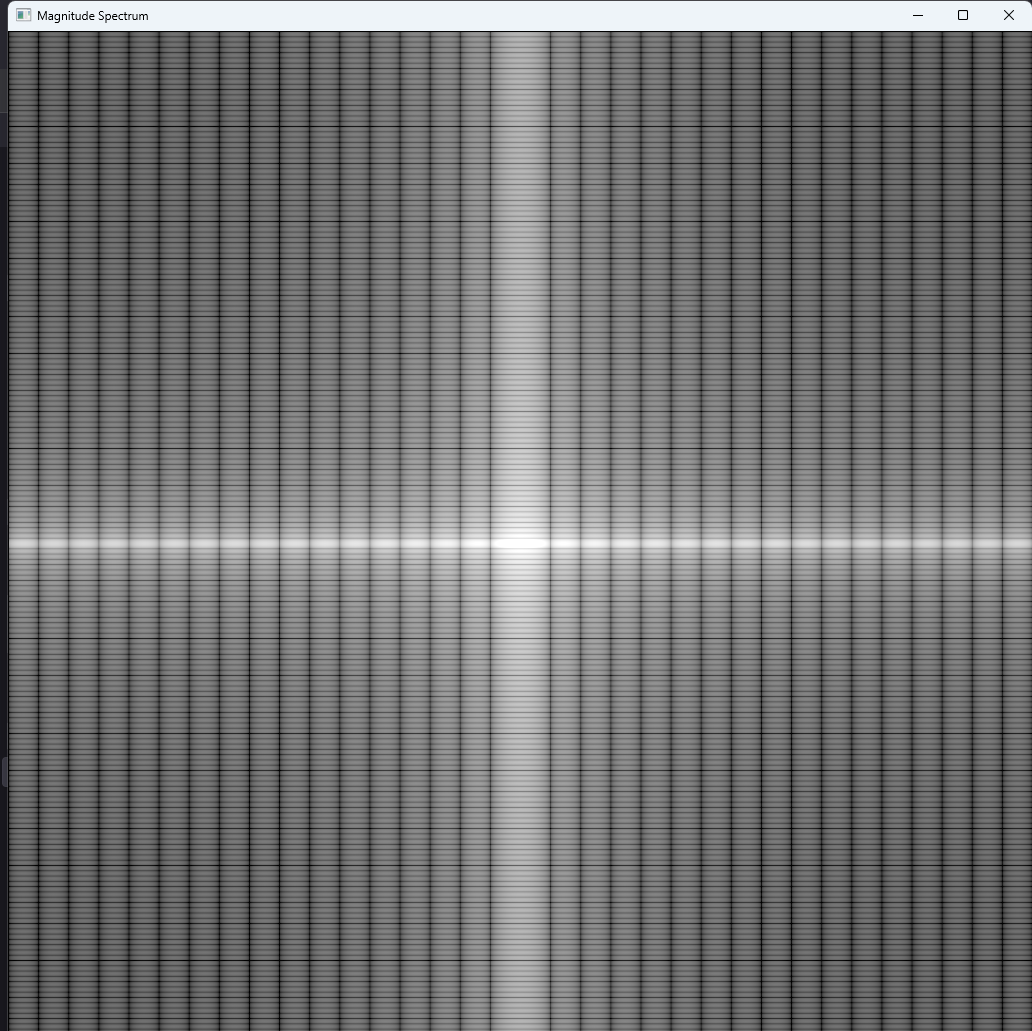

## Processamento utilizando a Transformada de Fourier Discreta

In [4]:
# Carrega-se a imagem e a converte em tons de cinza
img = cv2.imread("../dataset/OperacaoPontuais_FiltroEspacial/data/t1.jpg", cv2.IMREAD_GRAYSCALE)

# Conversão da imagem para float32
image_f32 = img.astype(np.float32)

# Realiza-se a Transformada de Fourier Discreta (DFT)
dft = cv2.dft(image_f32, flags=cv2.DFT_COMPLEX_OUTPUT)

# Desloca-se os componentes de frequência zero para o centro
fft_shift = np.fft.fftshift(dft)

# Calcula-se o espectro de magnitude
magnitude_spectrum = 20 * np.log(cv2.magnitude(fft_shift[:, :, 0], fft_shift[:, :, 1]))

# Normaliza-se o espectro de magnitude para o intervalo [0, 255]
magnitude_spectrum_normalized = cv2.normalize(magnitude_spectrum, None, 0, 255, cv2.NORM_MINMAX)

# Exibe a imagem original
cv2.imshow('Imagem', img)

# Exibe o espectro de magnitude
cv2.imshow('Espectro de Magnitude', magnitude_spectrum_normalized.astype(np.uint8))
cv2.waitKey(0)
cv2.destroyAllWindows()


### Output da Célula
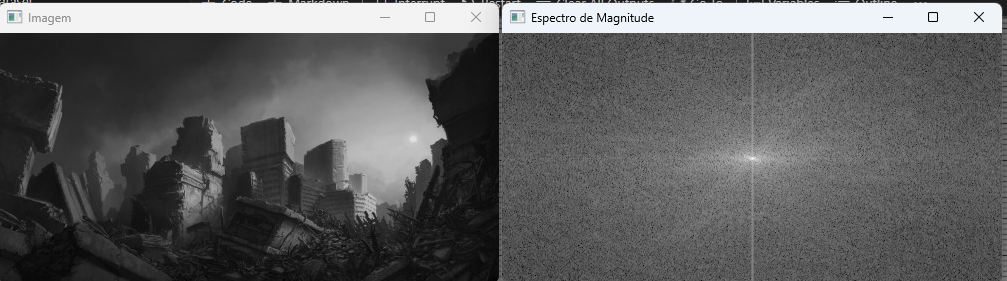

## Criação de um filtro ideal passa-baixo

In [5]:
# Determinação das Dimensões da Imagem:
rows, cols = img.shape

# Cálculo do Centro da Frequência:
crow, ccol = rows//2 , cols//2

# Criação da máscara que será usada para o Filtro Ideal:
mask = np.zeros((rows,cols,2), np.uint8) # H(u,v)

# Definição do Raio do Filtro:
raio = 80  # Valor do Raio é personalizavel de acordo com as necessidades.

# Configuração do Filtro de passa-baixa
mask[crow - raio:crow + raio, ccol - raio:ccol + raio, :] = 1

# Este filtro irá preservar as informações de baixa frequência 
# Este filtro também irá filtrar as informações de alta frequência
# Isso resultará em uma imagem com maior suavidade.

## Aplicação do filtro de passa-baixa à transformada de Fourier da imagem

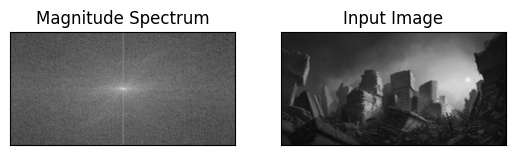

In [6]:
# Aplicação do Filtro de passa-baixa
fshift = fft_shift * mask  # Multiplica-se a transformada de Fourier deslocada pelo filtro de passagem de banda

# Inversão da Transformada de Fourier
f_ishift = np.fft.ifftshift(fshift) # aplicação da FFT inversa
img_back = cv2.idft(f_ishift) # aplicação da DFT 

# Cálculo da Magnitude da Transformada Inversa
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1]) 
img_back = np.array(img_back, dtype=np.float32)  # Converte para float32print(np.argmax(img_back))

# Exibição da Imagem Original no Domínio da Frequência e da Imagem Filtrada
plt.subplot(121),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.show()

# Aplicação de normalização à imagem filtrada
# Aplicar o absoluto
filtered_img = np.abs(img_back)
# Subtrair o valor mínimo
filtered_img -= filtered_img.min()
# Multiplicar a imagem por 255 e dividir pelo valor máximo
filtered_img = filtered_img * 255 / filtered_img.max()
# Fazer um cast para 8 bits
filtered_img = filtered_img.astype(np.uint8)

# Exibição da Imagem Filtrada Normalizada
cv2.imshow('filtered_img', filtered_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Output esperado pela célula
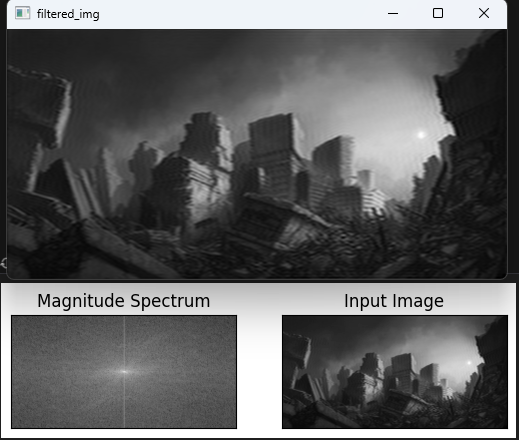

## Criar um filtro ideal de filtro ideal passa-alta

In [7]:
# Obtenção das dimensões da imagem
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2

# Criação de um filtro de passa-alta inicializado com 1 (todos os valores são 1)
mask = np.ones((rows, cols, 2), np.float32)

# Definição do raio do filtro de rejeição de banda
raio = 35 

# Definição da região do filtro onde as frequências serão rejeitadas (valor 0)
mask[crow - raio:crow + raio, ccol - raio:ccol + raio, :] = 0


# Este filtro tem uma função oposta ao filtro de passa-baixa
# Este mantém as informações de alta frequência da imagem
# Além de filtrar as informações de baixa frequência
# como consequência, os detalhes da imagem se tornam mais visíveis.

## Aplicação do Filtro de passa-alta em uma imagem

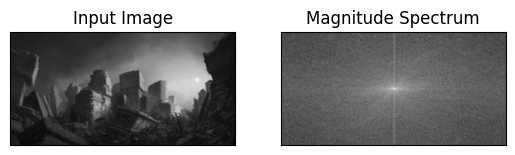

In [8]:
# Aplicação do Filtro de Passa-alta
fshift_pa = fshift * mask  # Multiplica a transformada de Fourier deslocada pelo filtro

# Inversão da Transformada de Fourier
f_ishift_pa = np.fft.ifftshift(fshift_pa)  # Inverte o deslocamento das frequências
img_back_pa = cv2.idft(f_ishift_pa) # Realiza a transformada inversa

# Cálculo da Magnitude da Transformada Inversa
img_magnitude_pa = cv2.magnitude(img_back_pa[:, :, 0], img_back_pa[:, :, 1])  #recuperando a imagem capturando a magnitude (intesidade) 


img_back = np.array(img_back, dtype=np.float32)

# Exibição da Imagem Original no Domínio da Frequência e da Imagem Filtrada
plt.subplot(121),plt.imshow(img_back, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

# Normalização da Imagem Filtrada para Exibição 
filtered_img = np.abs(img_magnitude_pa) # Aplica o valor absoluto
filtered_img -= filtered_img.min() # Subtrai o valor mínimo
filtered_img = filtered_img * 255 / filtered_img.max()  # Normaliza para [0, 255]
filtered_img = filtered_img.astype(np.uint8) # Converte para uint8


# Exibição da Imagem Original e da Imagem Filtrada usando OpenCV
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('filtered_img', filtered_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Output esperado pela célula
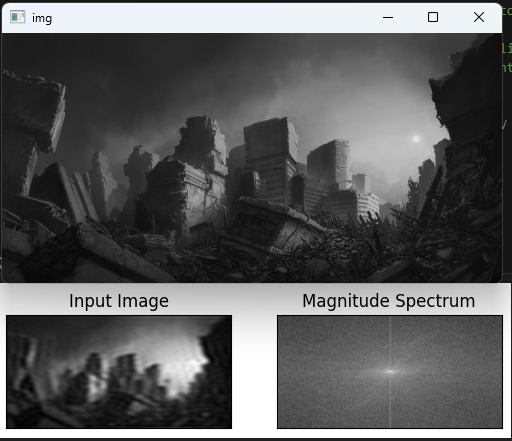

## Criando outros kernels - Gaussiano e Butterworth 

### Filtro passa-baixa

O filtro passa-baixa, que retém as informações de baixa frequência da transformada de Fourier e filtra as informações de alta frequência, tornará a imagem mais desfocada. Os filtros passa-baixa comumente usados incluem filtro passa-baixo ideal, filtro passa-baixo Butterworth e filtro passa-baixo Gaussiano. Suponha que a altura e a largura da transformada de Fourier sejam H e W, o valor máximo do espectro de Fourier está no ponto central (maxR,maxC) e D(r,c) representa a distância do ponto (r,c) até o ponto central


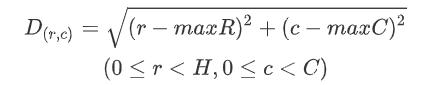



### Filtro passa-alta

O filtro passa-alta retém as informações de alta frequência da imagem e filtra as informações de baixa frequência, o que torna os detalhes da imagem mais óbvios. Os filtros passa-alta comumente usados incluem filtro passa-alto ideal, filtro passa-alto Butterworth e filtro passa-alto gaussiano. Três tipos de filtros passa-altas podem ser expressos da seguinte forma

### Filtro passa-banda

O filtro passa-banda serve para reter apenas a banda de frequência de uma determinada área e filtrar as informações de frequência, que podem selecionar seletivamente parte das informações da imagem. Os filtros passa-banda comumente usados incluem filtro passa-banda ideal, filtro passa-banda Butterworth e filtro passa-banda gaussiano. Assumindo que BW representa a largura de banda e D0 representa o centro radial da largura de banda, os três filtros passa banda podem ser expressos da seguinte forma

### Filtro rejeita-banda

Em contraste com o filtro passa-banda, o filtro de rejeita-banda se refere a filtrar ou enfraquecer a banda de frequência na faixa especificada. Os filtros de rejeita-banda comumente usados incluem filtro de parada de banda ideal, filtro de parada de banda Butterworth e filtro de parada de banda Gaussiana. Os três filtros de parada de banda são representados da seguinte forma

## Criação da função de filtragem passa-baixa 

In [9]:
def createPB(shape, center, radius, lpType=2, n=2):
    rows, cols = img.shape[:2] # Obtém as dimensões da imagem de entrada
    r, c = np.mgrid[0:rows, 0:cols] # Cria uma matriz de coordenadas r e c
    c -= center[0] # Desloca as coordenadas c pelo valor do centro
    r -= center[1] # Desloca as coordenadas r pelo valor do centro
    d = np.sqrt(np.power(c, 2) + np.power(r, 2)) # Calcula a distância d a partir das coordenadas r e c
    lpFilter_matrix = np.zeros(shape, dtype=np.float32) # Cria uma matriz para armazenar o filtro no domínio da frequência


    if lpType == 0:  # Ideal low-pass filter
        print("Ideal high-pass filter")
        lpFilter = np.copy(d)
        lpFilter[d > radius] = 0    
        lpFilter[d <= radius] = 1 
        
    elif lpType == 1:  # Butterworth low-pass filter
        print("Butterworth low-pass filter")
        lpFilter = 1 / (1 + np.power(d / radius, 2 * n))
    elif lpType == 2:  # Gaussian low-pass filter
        print("Gaussian low-pass filter")
        lpFilter = np.exp(-np.power(d, 2) / (2 * np.power(radius, 2)))

    lpFilter_matrix[:, :, 0] = lpFilter # Atribui o filtro à primeira camada da matriz
    lpFilter_matrix[:, :, 1] = lpFilter # Atribui o filtro à segunda camada da matriz
    return lpFilter_matrix


### As fórmulas que foram utilizadas como referência para criar as equações vistas são as seguintes:

### Variavel D
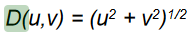


BACKES, André . FILTRAGEM NO DOMÍNIO DA FREQUÊNCIA. Universidade Federal de Uberlândia, 2014. Disponível em: https://www.facom.ufu.br/~backes/gsi058/Aula07-FiltragemFrequencia.pdf. Acesso em: 25 out. 2023. 

### Filtro passa-baixo ideal
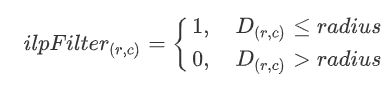

### Filtro passa-baixa Butterworth
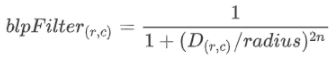


### Filtro passa-baixo gaussiano
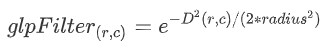

## Criação da função de filtragem passa-Alta 

In [10]:
def createPA(shape, center, radius, lpType = 2, n = 2):
    rows, cols = shape[:2] # Obtém as dimensões da imagem
    r, c = np.mgrid[0:rows, 0:cols] # Cria uma matriz de coordenadas r e c
    c -= center[0]  # Desloca as coordenadas c pelo valor do centro
    r -= center[1]  # Desloca as coordenadas r pelo valor do centro
    d = np.sqrt(np.power(c,2) + np.power(r,2))  # Calcula a distância d a partir das coordenadas r e c
    paFilter_matrix = np.zeros(shape, np.float32)   # Cria uma matriz para armazenar o filtro no domínio da frequência

    if lpType == 0:  # Ideal high-pass filter
        print("Ideal high-pass filter")
        paFilter = np.copy(d)
        paFilter[d <= radius] = 0
        paFilter[d > radius] = 1
    elif lpType == 1:  # Butterworth high-pass filter
        print("Butterworth high-pass filter")
        paFilter = 1 - 1 / (1 + (np.power(d / radius, 2 * n)))
    elif lpType == 2:  # Gaussian high-pass filter
        print("Gaussian high-pass filter")
        paFilter = 1 - np.exp(-d**2 / (2 * radius**2))

    paFilter_matrix[:, :, 0] = paFilter # Atribui o filtro à primeira camada da matriz
    paFilter_matrix[:, :, 1] = paFilter # Atribui o filtro à segunda camada da matriz

    return paFilter_matrix

### As fórmulas que foram utilizadas como referência para criar as equações vistas são as seguintes:

#### Filtro passa-alta ideal
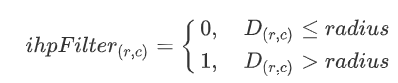



#### Filtro passa-alta Butterworth
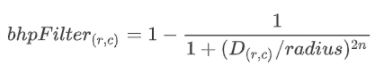

#### Filtro passa-alta gaussiano
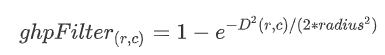

## Criação da função de filtragem passa-banda 

In [11]:
def createPF(shape, center, bandCenter, bandWidth, lpType=2, n=2):
    rows, cols = shape[:2]  # Obtém as dimensões da imagem (não fornecida neste trecho)
    r, c = np.mgrid[0:rows, 0:cols]  # Cria uma matriz de coordenadas r e c
    c -= center[0]  # Desloca as coordenadas c pelo valor do centro
    r -= center[1]  # Desloca as coordenadas r pelo valor do centro
    d = np.sqrt(np.power(c,2) + np.power(r,2)) # Calcula a distância d a partir das coordenadas r e c
    lpFilter_matrix = np.zeros(shape, np.float32) # Cria uma matriz para armazenar o filtro no domínio da frequência
    
    if lpType == 0:  # Ideal bandpass filter
        print("Ideal bandpass filter")
        lpFilter = np.zeros_like(d)
        lpFilter[(d >= bandCenter - (bandWidth / 2)) & (d <= bandCenter + (bandWidth / 2))] = 1        
    elif lpType == 1:  # Butterworth bandpass filter 
        print("Butterworth bandpass filter ")
        lpFilter = 1 - ( 1 / (1 + ((d *bandWidth / (d - (bandCenter**2)))**(2*n))))
    elif lpType == 2:  # Gaussian bandpass filter
        print("Gaussian bandpass filter")
        lpFilter = np.exp(-np.power((d - np.power(bandCenter, 2)) / (d * np.power(bandWidth, 2)), 2))
    
    lpFilter_matrix[:, :, 0] = lpFilter # Atribui o filtro à primeira camada da matriz
    lpFilter_matrix[:, :, 1] = lpFilter # Atribui o filtro à segunda camada da matriz
    return lpFilter_matrix

### As fórmulas que foram utilizadas como referência para criar as equações vistas são as seguintes:

#### Filtro passa-banda ideal
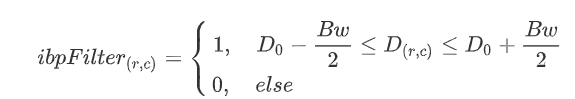

#### Filtro passa-banda Butterworth
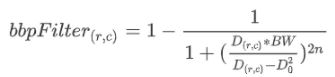

#### Filtro passa-banda gaussiano
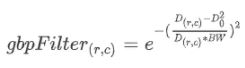

## Criação da função de filtragem Rejeita-Banda

In [12]:
def createRF(shape, center, bandCenter, bandWidth, lpType=2, n=2):
    rows, cols = shape[:2] # Obtém as dimensões da imagem
    r, c = np.mgrid[0:rows, 0:cols] # Cria uma matriz de coordenadas r e c usando np.mgrid
    c -= center[0]  # Desloca as coordenadas c pelo valor do centro
    r -= center[1]  # Desloca as coordenadas r pelo valor do centro
    d = np.sqrt(np.power(c,2) + np.power(r,2)) # Calcula a distância d a partir das coordenadas r e c
    lpFilter_matrix = np.zeros(shape, np.float32)   # Cria uma matriz para armazenar o filtro no domínio da frequência
    if lpType == 0:  # Ideal band stop filter
        print("Ideal band stop filter")
        lpFilter = np.copy(d)
        lpFilter[(d >= bandCenter - (bandWidth / 2)) & (d <= bandCenter + (bandWidth / 2))] = 0       
        lpFilter[d < (bandCenter - bandWidth / 2)] = 1
        lpFilter[d > (bandCenter + bandWidth / 2)] = 1
    elif lpType == 1: #Butterworth band stop filter
        print("Butterworth band stop filter")
        lpFilter = 1 / (1 + (((d * bandWidth)/ (d - (bandCenter**2)) )**(2*n)))
    elif lpType == 2: # Gaussian band stop filter
        print("Gaussian band stop filter")
        lpFilter = 1 - np.exp(-(((d - bandCenter**2) / (d * bandWidth))**2))
        
    lpFilter_matrix[:, :, 0] = lpFilter # atribuição para criação na primeira camada
    lpFilter_matrix[:, :, 1] = lpFilter # atribuição para criação na segunda camada
    return lpFilter_matrix


### As fórmulas que foram utilizadas como referência para criar as equações vistas são as seguintes:

#### Filtro de parada de banda ideal
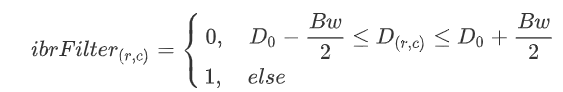

#### Filtro de parada de banda Butterworth
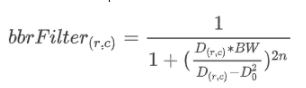

#### Filtro de parada de banda gaussiana
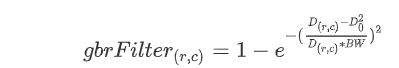

## Processamento de uma imagem no domínio da frequência usando a Transformada de Fourier Discreta

In [13]:
img = cv2.imread("../dataset/OperacaoPontuais_FiltroEspacial/data/t1.jpg", cv2.IMREAD_GRAYSCALE)
image_f32 = np.float32(img) # convert from uint8 into float32
dft = cv2.dft(image_f32, flags=cv2.DFT_COMPLEX_OUTPUT) # Aplica a Transformada de Fourier Discreta (DFT)
fft_shift = np.fft.fftshift(dft) # Aplica o deslocamento da frequência zero para o centro da imagem
magnitude_spectrum = 20 * np.log(cv2.magnitude(fft_shift[:, :, 0], fft_shift[:, :, 1])) # Calcula o espectro de magnitude e aplica log

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Normalização do espectro de magnitude
magnitude_spectrum = np.abs(magnitude_spectrum)
magnitude_spectrum -= magnitude_spectrum.min()
magnitude_spectrum = magnitude_spectrum * 255 / magnitude_spectrum.max()
magnitude_spectrum = magnitude_spectrum.astype(np.uint8)

cv2.imshow('magnitude_spectrum', magnitude_spectrum)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Cálculo de valores necessários para as futuras contas
### Calcular a amplitude do espectro de frequência, encontrar os valores extremos (mínimo e máximo) e as posições correspondentes nesse espectro.

In [14]:
nrows, ncols = fshift.shape[:2]   # Obtém as dimensões da imagem no domínio da frequência
real = fft_shift[:, :, 0]  # Obtém a parte real do espectro de frequência (primeira camada)
imaginary = fft_shift[:, :, 1]  # Obtém a parte imaginária do espectro de frequência (segunda camada)
amplitude = np.sqrt(np.power(real, 2) + np.power(imaginary, 2))  # Calcula a amplitude do espectro
minValue, maxValue, minLoc, maxLoc = cv2.minMaxLoc(amplitude)  # Encontra os valores extremos (mínimo e máximo) e suas posições

## Aplicar um filtro passa-baixa em uma imagem

Gaussian low-pass filter


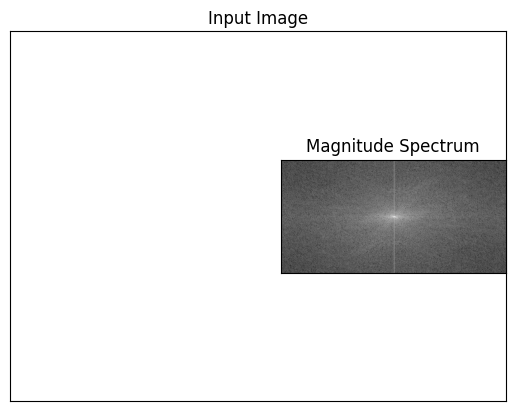

In [15]:
# Criando uma máscara de filtro passa-baixa Butterworth com determinadas características
maskPB = createPB(shape=fshift.shape, center=maxLoc, radius=80, lpType=2, n=2)

# Aplicando a máscara de filtro na imagem no domínio da frequência
filtered_freq = fshift * maskPB

# Realizando a inversão do deslocamento da FFT
f_ishift = np.fft.ifftshift(filtered_freq) 

# Aplicando a Transformada Inversa de Fourier para obter a imagem no domínio espacial
img_back = cv2.idft(f_ishift)

# Calculando a magnitude da imagem no domínio espacial
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

# Convertendo a imagem para o tipo de dado float32
img_back = np.array(img_back, dtype=np.float32)

# Plotando a imagem restaurada e o espectro de magnitude original usando a biblioteca Matplotlibplt.subplot(121),plt.imshow(img_back, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

# Normalizando a imagem para exibição com a função imshow() da OpenCV
filtered_img = np.abs(img_back)
filtered_img -= filtered_img.min()
filtered_img = filtered_img * 255 / img_back.max()
filtered_img = filtered_img.astype(np.uint8)

# Exibindo a imagem filtrada usando a OpenCV
cv2.imshow('filtered_img', filtered_img)
cv2.waitKey(0)
cv2.destroyAllWindows()



### Output esperado da célula

#### lpType = 0
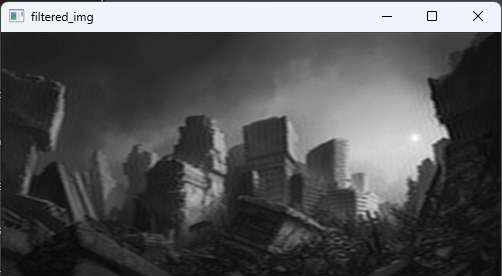

#### lpType = 1
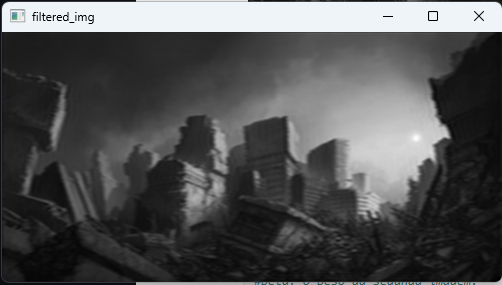

#### lpType = 2
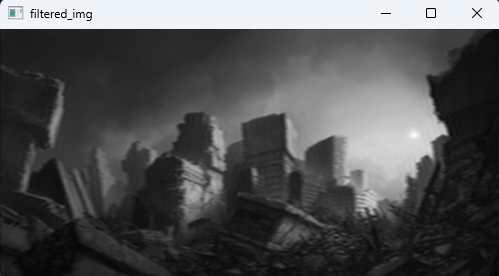

## Aplicar um filtro passa-alta em uma imagem

Gaussian high-pass filter


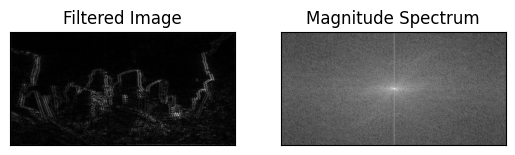

In [16]:
# Criando uma máscara de filtro passa-alta Butterworth com determinadas características
maskPA = createPA(fshift.shape, center=maxLoc, radius=35, lpType=2, n=1)
# Aplicando o filtro no domínio da frequência
fshift_pa = fshift * maskPA 

# Realizando a inversão do deslocamento da FFT
f_ishift_pa = np.fft.ifftshift(fshift_pa) 

# Aplicando a Transformada Inversa de Fourier para obter a imagem no domínio espacial
img_back_pa = cv2.idft(f_ishift_pa)

# Calculando a magnitude da imagem no domínio espacial
img_magnitude_pa = cv2.magnitude(img_back_pa[:, :, 0], img_back_pa[:, :, 1])  

# Convertendo a imagem para o tipo de dado float32
image_back = np.array(img_magnitude_pa, dtype=np.float32)

# Exibir a imagem resultante sem regularização com o Matplotlib
plt.subplot(121), plt.imshow(image_back, cmap='gray')
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])

# Exibir o espectro de magnitude
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

# Normalizar a imagem para exibição com a imshow() da OpenCV
filtered_img = np.abs(image_back)
filtered_img -= filtered_img.min()
filtered_img = filtered_img * 255 / filtered_img.max()
filtered_img = filtered_img.astype(np.uint8)

# Exibir a imagem resultante com a OpenCV
cv2.imshow('filtered_img', filtered_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Output esperado da célula

#### lpType = 0
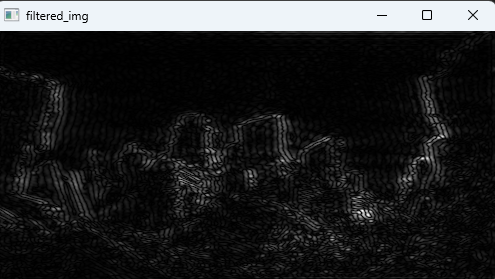

#### lpType = 1
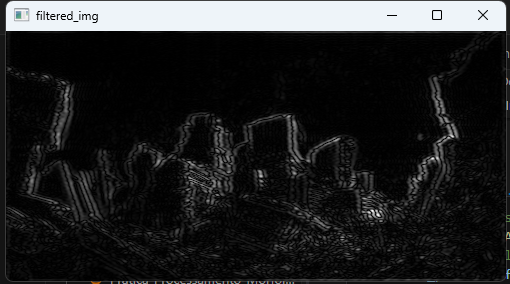

#### lpType = 2
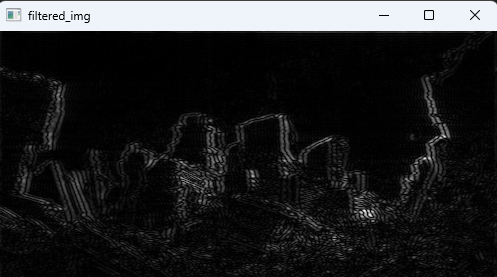

## Aplicar um  filtro Passa-Banda em uma imagem

Gaussian bandpass filter


C:\Users\berna\AppData\Local\Temp\ipykernel_15036\3790366982.py:18: RuntimeWarning: divide by zero encountered in divide
  lpFilter = np.exp(-np.power((d - np.power(bandCenter, 2)) / (d * np.power(bandWidth, 2)), 2))


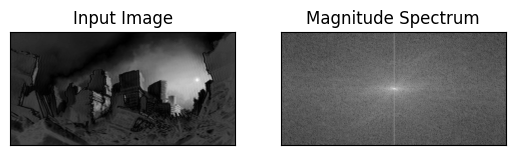

In [18]:
# Criar uma máscara de filtro de passagem de banda (band pass) com características específicas
maskPF = createPF(shape=fshift.shape, center=maxLoc, bandCenter=1, bandWidth=400, lpType=2, n=2)

# Aplicar o filtro no domínio da frequência multiplicando a imagem no domínio da frequência pelo kernel
filtered_freq = fshift * maskPF  
# Inverter o deslocamento da FFT
f_ishift = np.fft.ifftshift(filtered_freq) 
# Aplicar a Transformada Inversa de Fourier (DFT) para obter a imagem no domínio espacial
img_back = cv2.idft(f_ishift) 
# Calcular a magnitude da imagem no domínio espacial
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])  # Retrieve the image by capturing the magnitude (intensity) - cv2.magnitude
# Converter a imagem para o tipo de dado float32
img_back = np.array(img_back, dtype=np.float32)

# Exibir a imagem resultante sem normalização usando Matplotlib
plt.subplot(121), plt.imshow(img_back, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
# Exibir o espectro de magnitude
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title ('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

# Normalizar a imagem para exibição com a imshow() da OpenCV
filtered_img = np.abs(img_back) # - Aplicar o valor absoluto seguido pela subtração entre valores: np.abs
filtered_img -= filtered_img.min() # - Subtrair os valores dos pixels pelo valor mínimo de pixel: .min
filtered_img = filtered_img * 255 / filtered_img.max() # - Multiplicar a imagem por 255 e dividir pelo valor máximo de pixel: .max
filtered_img = filtered_img.astype(np.uint8) # - Fazer o cast da imagem para 8 bits usando a função astype() do NumPy

# Exibir a imagem resultante com a OpenCV
cv2.imshow('filtered_img', filtered_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


### Output esperado da célula

#### lpType = 0
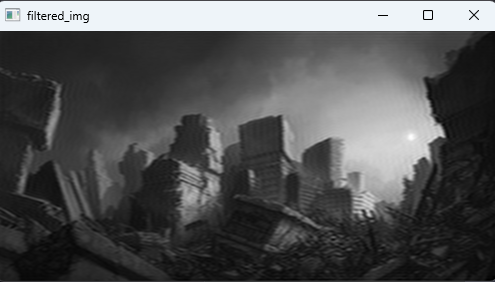

#### lpType = 1
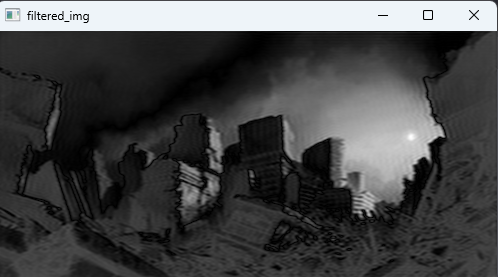

#### lpType = 2
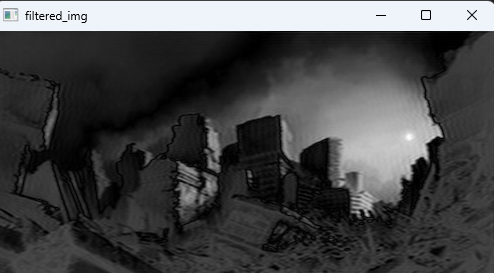

## Aplicar um  filtro Rejeita-Banda em uma imagem

Gaussian band stop filter


C:\Users\berna\AppData\Local\Temp\ipykernel_18692\289111687.py:19: RuntimeWarning: divide by zero encountered in divide
  lpFilter = 1 - np.exp(-(((d - bandCenter**2) / (d * bandWidth))**2))


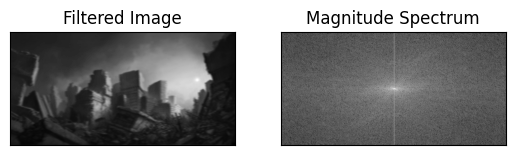

In [ ]:
# Criar uma máscara de filtro de rejeição de banda (band stop) com características específicas
maskRF = createRF(shape=fshift.shape, center=maxLoc, bandCenter=50, bandWidth=50, lpType=2, n=2)

# Aplicar o filtro no domínio da frequência multiplicando pela imagem no domínio da frequência pelo kernel
filtered_freq = fshift * maskRF  # Multiplique a imagem no domínio da frequência pelo kernel

# Inverter o deslocamento da FFT
f_ishift = np.fft.ifftshift(filtered_freq)
# Aplicar a Transformada Inversa de Fourier (DFT) para obter a imagem no domínio espacial
img_back = cv2.idft(f_ishift) 
# Calcular a magnitude da imagem no domínio espacial
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])  # Recuperando a imagem capturando a magnitude (intensidade) - cv2.magnitude

# Converter a imagem resultante para float32
img_back = np.array(img_back, dtype=np.float32)

# Exibir a imagem resultante sem regularização com o Matplotlib
plt.subplot(121), plt.imshow(img_back, cmap='gray')
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])

# Exibir o espectro de magnitude
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

# Normalizar a imagem para exibição com a imshow() da OpenCV
filtered_img = np.abs(img_back) # - Aplicar o valor absoluto, seguido pela subtração entre valores: np.abs
filtered_img -= filtered_img.min() # - Subtrair os valores dos pixels pelo valor mínimo de pixel: .min
filtered_img = filtered_img * 255 / filtered_img.max() # - Multiplicar a imagem por 255 e dividir pelo valor máximo de pixel: .max
filtered_img = filtered_img.astype(np.uint8) # - Fazer o cast da imagem para 8 bits usando a função astype() do NumPy

# Exibir a imagem resultante com a OpenCV
cv2.imshow('filtered_img', filtered_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


### Output esperado da célula

#### lpType = 0
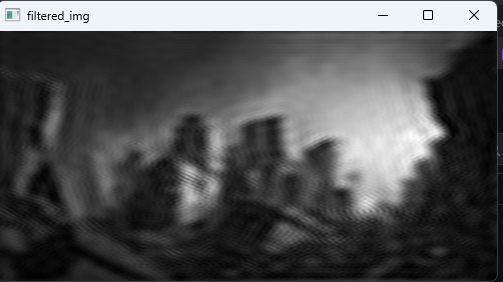

#### lpType = 1
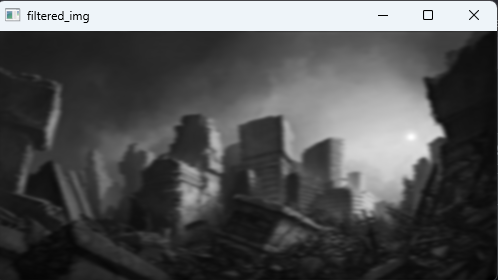

#### lpType = 2
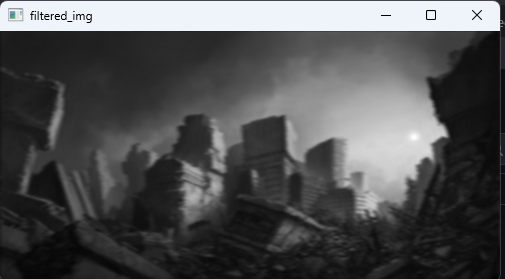